In [0]:
!git clone https://github.com/hamishgibbs/Galapagos_Mapper.git /usr/lib/python3/dist-packages/Galapagos_Mapper
!sudo python /usr/lib/python3/dist-packages/Galapagos_Mapper/setup.py install
!pip install geopandas
!pip install shapely
!pip install rasterio

Cloning into '/usr/lib/python3/dist-packages/Galapagos_Mapper'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 116.98 KiB | 573.00 KiB/s, done.
Resolving deltas: 100% (35/35), done.
running install
running bdist_egg
running egg_info
creating Galapagos_Mapper.egg-info
writing Galapagos_Mapper.egg-info/PKG-INFO
writing dependency_links to Galapagos_Mapper.egg-info/dependency_links.txt
writing top-level names to Galapagos_Mapper.egg-info/top_level.txt
writing manifest file 'Galapagos_Mapper.egg-info/SOURCES.txt'
reading manifest file 'Galapagos_Mapper.egg-info/SOURCES.txt'
writing manifest file 'Galapagos_Mapper.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying Galapagos_Mapper.egg-info/PKG-INFO -> build/bdi

In [0]:
from google.colab import drive
from google.colab import files

#Read and write files directly from google drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from Galapagos_Mapper.mapping import MapClass

In [0]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import shapely

In [0]:
volcanoes = gpd.read_file('drive/My Drive/Hamish mapping/Hamish mapping/Environmental layers/Shp/Island_volcanos_wgs.shp', 
                          driver='ESRI Shapefile')
coastline = gpd.read_file('drive/My Drive/Hamish mapping/Hamish mapping/useful general mapping data - elevation and perimeter/Linea_Costa/PERFIL_Project.shp', 
                       driver='ESRI Shapefile')
point_data = pd.read_csv('drive/My Drive/Hamish mapping/Hamish mapping/Occurence data to Oct 2019/Training_data_2019_occ_move_thinned.csv')

hillshade = rasterio.open('drive/My Drive/Hamish mapping/Hamish mapping/tmp/hillshade.tif')

dem = rasterio.open('drive/My Drive/Hamish mapping/Hamish mapping/tmp/DEM_nan.tif')

In [0]:
map_test = MapClass.galapagos_map(volcanoes, 'Espanola', fig_size='small')

In [0]:
map_test.volcano_names

['Espanola',
 'Floreana',
 'Santa Fe',
 'San Cristobal',
 'Pinzon',
 'Santa Cruz',
 'Baltra',
 'Rabida',
 'Seymour',
 'Fernandina',
 'Santiago',
 'Genovesa',
 'Marchena',
 'Pinta',
 'Alcedo',
 'Darwin',
 'Ecuador',
 'South',
 'Wolf',
 'Archipelago',
 'Isabela']

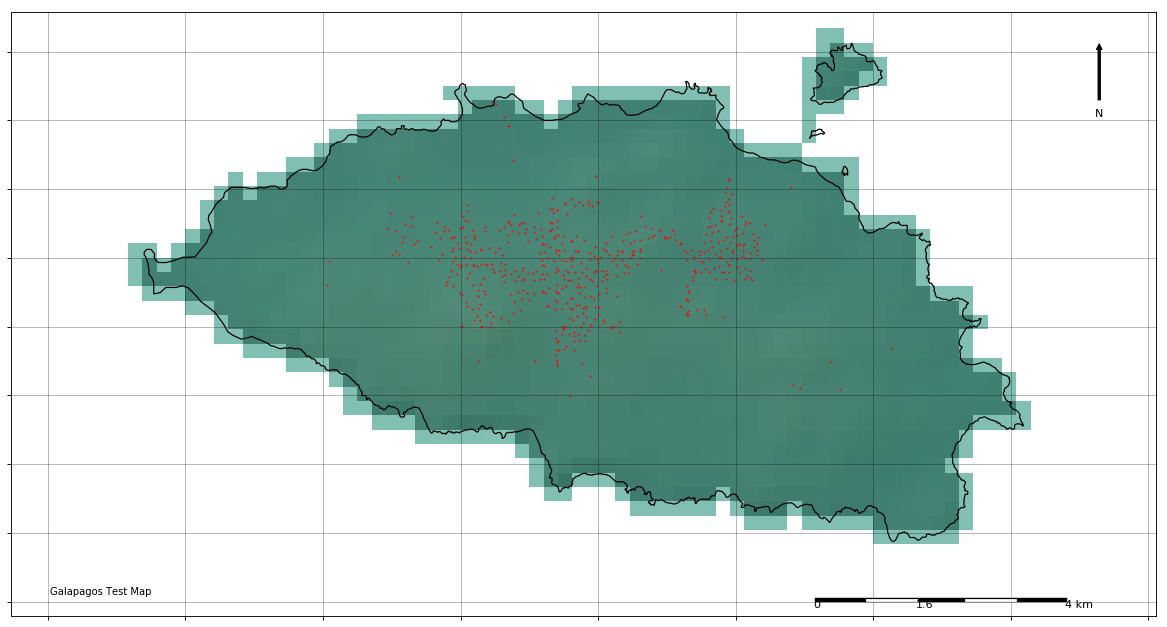

In [0]:
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.dpi"] = 80
map_test.base_map()
map_test.add_raster_data(hillshade, cmap='gray')
map_test.add_raster_data(dem, cmap='summer', alpha=0.5)
map_test.add_xy_data(point_data['Long'], point_data['Lat'], s=0.5, color='red')
map_test.add_vector_data(coastline, color='k', linewidth=1.1)
#map_test.add_ocean_color('lightblue')
map_test.add_attribution_text('Galapagos Test Map', size=9)
map_test.add_grid(color='k', alpha=0.3)

In [0]:
#Now write the documentation